<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
train = pd.read_csv('/content/sample_data/fashion-mnist_train.csv')
test = pd.read_csv('/content/sample_data/fashion-mnist_test.csv')

In [72]:
train.shape

(60000, 785)

In [73]:
test.shape

(10000, 785)

In [74]:
test['label'].nunique()

10

In [75]:
test['label'].value_counts()

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64

In [76]:
X_train = np.array(train.iloc[:, 1:])
y_train = np.array(train.iloc[:, 0])
X_test =  np.array(test.iloc[:, 1:])
y_test = np.array(test.iloc[:, 0])

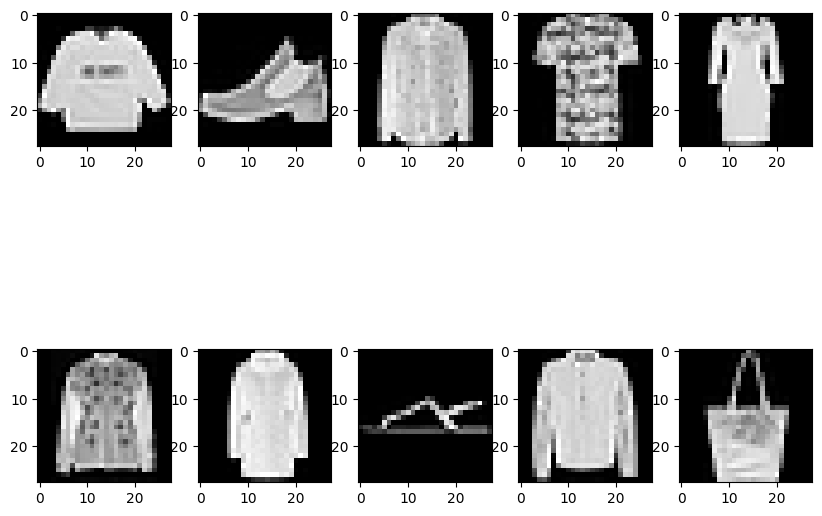

In [77]:
r = 2
c = 5
plt.figure(figsize=(10,8))
for i in list(range(r*c)):
    plt.subplot(r, c, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")

plt.show()

In [80]:
tree_clf = DecisionTreeClassifier()

params = {
    'max_depth': range(1, 10 + 1, 2),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': range(1, 5 + 1, 2),
    'min_samples_leaf': range(1, 5 + 1, 2)
}

grid = GridSearchCV(tree_clf, params, cv=2)


In [81]:
grid.fit(X_train[:10000], y_train[:10000])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11, 2),
                         'min_samples_leaf': range(1, 6, 2),
                         'min_samples_split': range(1, 6, 2)})

In [82]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [83]:
clf = grid.best_estimator_

In [84]:
y_pred = clf.predict(X_test)

In [85]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [88]:
precision_score(y_test, y_pred, average='micro')

0.7795

In [89]:
recall_score(y_test, y_pred, average='micro')

0.7795

In [91]:
accuracy_score(y_test, y_pred)

0.7795

<img src='https://m.media-amazon.com/images/I/71X93o94J0L.png' width=30%>

<H1>SWAG</H1>